<a href="https://colab.research.google.com/github/shreyakaushik19/codsoft_machinelearning/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
ds = pd.read_csv('/Churn_Modelling.csv')

First 5 rows of the Dataset

In [3]:
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Last 5 rows of the Dataset

In [4]:
ds.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


Shape of our Dataset

In [5]:
ds.shape

(10000, 14)

In [6]:
print("Number of rows:", ds.shape[0])
print("Number of columns:", ds.shape[1])

Number of rows: 10000
Number of columns: 14


Get all the information of our dataset

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Checking null values in our dataset

In [8]:
ds.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
ds.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


Dropping irrelevant features

In [10]:
ds.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [12]:
ds.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Encoding categorical data

In [13]:
ds['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [14]:
ds = pd.get_dummies(ds, drop_first=True)

In [15]:
ds.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Not handling imbalanced

In [16]:
ds['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [17]:
X = ds.drop('Exited',axis=1)
y = ds['Exited']

Handling imbalanced data with SMOTE

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [20]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

Splitting dataset into training and test set

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

Feature scaling

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc = StandardScaler()

In [25]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
log = LogisticRegression()

In [28]:
log.fit(X_train, y_train)

LogisticRegression()

In [29]:
y_pred1 = log.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test, y_pred1)

0.785624607658506

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [33]:
precision_score(y_test, y_pred1)

0.7708592777085927

In [34]:
recall_score(y_test, y_pred1)

0.7971667739858339

In [35]:
f1_score(y_test, y_pred1)

0.7837923393478949

SVC

In [36]:
from sklearn import svm

In [37]:
svm = svm.SVC()

In [38]:
svm.fit(X_train, y_train)

SVC()

In [39]:
y_pred2 = svm.predict(X_test)

In [40]:
accuracy_score(y_test, y_pred2)

0.8480853735091023

In [41]:
precision_score(y_test, y_pred2)

0.8355304456999372

In [42]:
recall_score(y_test, y_pred2)

0.8570508692852543

In [43]:
f1_score(y_test, y_pred2)

0.8461538461538461

KNeighbours Classifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier()

In [46]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
y_pred3 = knn.predict(X_test)

In [48]:
accuracy_score(y_test, y_pred3)

0.825172630257376

In [49]:
precision_score(y_test, y_pred3)

0.7985611510791367

In [50]:
recall_score(y_test, y_pred3)

0.8576947842884739

In [51]:
f1_score(y_test, y_pred3)

0.827072337783297

Decision Tree Classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
dt = DecisionTreeClassifier()

In [54]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [55]:
y_pred4 = dt.predict(X_test)

In [56]:
accuracy_score(y_test, y_pred4)

0.7919020715630886

In [57]:
precision_score(y_test, y_pred4)

0.7693704600484261

In [58]:
recall_score(y_test, y_pred4)

0.8184159690920798

In [59]:
f1_score(y_test, y_pred4)

0.7931357254290171

Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf = RandomForestClassifier()

In [62]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [63]:
y_pred5 = rf.predict(X_test)

In [64]:
accuracy_score(y_test, y_pred5)

0.8691148775894538

In [65]:
precision_score(y_test, y_pred5)

0.8545568039950062

In [66]:
recall_score(y_test, y_pred5)

0.8815196394075981

In [67]:
f1_score(y_test, y_pred5)

0.8678288431061807

Gradient Boosting Classifier

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

In [69]:
gbc = GradientBoostingClassifier()

In [70]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [71]:
y_pred6 = gbc.predict(X_test)

In [72]:
accuracy_score(y_test, y_pred6)

0.849654739485248

In [73]:
precision_score(y_test, y_pred6)

0.8407360406091371

In [74]:
recall_score(y_test, y_pred6)

0.8531873792659369

In [75]:
f1_score(y_test, y_pred6)

0.8469159475870885

In [76]:
final_scores_acc = pd.DataFrame({'Models':['LR', 'SVC', 'KNN', 'DT', 'RF', 'GBC'],
                            'ACC':[accuracy_score(y_test, y_pred1),
                                  accuracy_score(y_test, y_pred2),
                                  accuracy_score(y_test, y_pred3),
                                  accuracy_score(y_test, y_pred4),
                                  accuracy_score(y_test, y_pred5),
                                  accuracy_score(y_test, y_pred6),]
                            })

In [77]:
final_scores_acc

,Models,ACC
0,LR,0.785625
1,SVC,0.848085
2,KNN,0.825173
3,DT,0.791902
4,RF,0.869115
5,GBC,0.849655


In [78]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

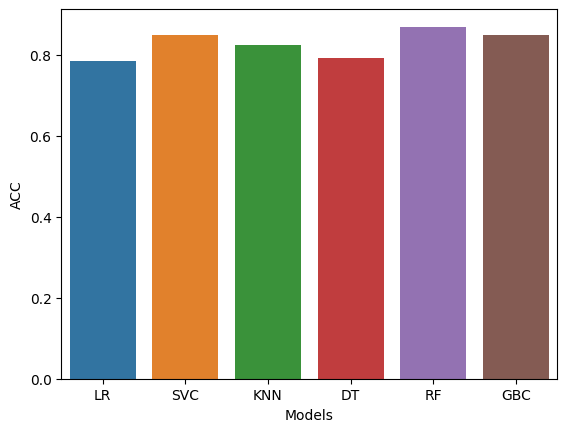

In [79]:
sns.barplot(x=final_scores_acc['Models'], y=final_scores_acc['ACC'])

In [80]:
final_scores_pre = pd.DataFrame({'Models':['LR', 'SVC', 'KNN', 'DT', 'RF', 'GBC'],
                            'PRE':[precision_score(y_test, y_pred1),
                                  precision_score(y_test, y_pred2),
                                  precision_score(y_test, y_pred3),
                                  precision_score(y_test, y_pred4),
                                  precision_score(y_test, y_pred5),
                                  precision_score(y_test, y_pred6),]
                            })

In [81]:
final_scores_pre

,Models,PRE
0,LR,0.770859
1,SVC,0.835530
2,KNN,0.798561
3,DT,0.769370
4,RF,0.854557
5,GBC,0.840736


<Axes: xlabel='Models', ylabel='PRE'>

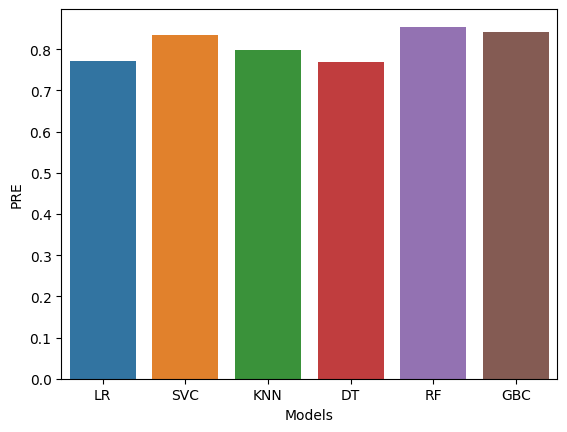

In [82]:

sns.barplot(x=final_scores_pre['Models'], y=final_scores_pre['PRE'])

Save the model

In [83]:
X_res = sc.fit_transform(X_res)

In [84]:
rf.fit(X_res, y_res)

RandomForestClassifier()

In [85]:
import joblib

In [86]:
joblib.dump(rf, 'churn_predict')

['churn_predict']

In [87]:
model = joblib.load('churn_predict')

In [88]:
ds.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [89]:
model.predict([[619, 42, 2, 0.0, 0, 0, 0, 101348.88, 0, 0, 0]]) #demo of prediction

array([0])

From the model trainings and visualizations we can conclude that Random Forest has the best combination of accuracy score(0.8625) and precision score(0.8469)